# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 3</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, **Oct 15th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: J.T. Flume

EID:

Name: Brandon Pover

EID:

# Question 1: Stochastic gradient descent II (20 pts)

Write Python code for an SGD solution to the non-linear model without using any library except for those provided in the code template. 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2 + w_4x_1x_2^2 + w_5x_2^3$$ 

The solution class template is given. The `init()` function of the class takes as input the `learning_rate`, `regularization_constant` and `number_of_epochs`. The `fit()` method must take as input `X`, `y` and `update_rule` which can be `'sgd_momentum'` or `'RMSprop'`. The `predict()` method takes an `X` value (optionally, an array of values). 

Use your new gradient descent regression to train your model and predict the data given in 'SGD_samples.csv', for 30 epochs, using learning rates: `[0.0001, 0.001, 0.01, 0.05]` and regularization (ridge regression) constants: `[0, 0.01, 0.1]`. **(8 points)** 

Plot MSE and the $w$ parameters as a function of epoch (for 30 epochs) for the best 2 combinations of `learning_rate` and `regularization_constant` for SGD-Momentum and RMSprop, i.e., you should have one plot for MSE vs epoch and the parameters(weights) values vs epoch using respectively SGD-Momentum and RMSprop. You should use different colors to denote different weights and put them in the same plot for each scheme. For each scheme, you need to plot 2\*2 plots so you need to plot 8 plots totally. Report the `learning_rate`, `regularization_constant` and MSE at the end of 30 epochs for the two best combinations for SGD-Momentum and RMSprop respectively. **($4\times 2 = 8$ pts)**

Since the model in this question is simple, RMSprop might not outperform and show its advantage like in Deep Neural Network. Explain the difference between Momentum and RMSprop. Please describe results of the two learning schemes**(2 pts)** and how you expect momentum and RMSprop's performance in more complicated model.**(2 pts)** 

Here is a blog which you can go through to know about RMSprop - [blog](http://ruder.io/optimizing-gradient-descent/).

The code given is just a reference for you. You can change the structure of the code but please don't change the given hyper-parameters.


In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.zeros(5) # coefficient vector
        self.eps = 10**-6 # only used in RMSprop
        self.cache = np.zeros(self.coef.shape) # only used in RMSprop
        self.mu = 0.9 # used in momentum


    def rmsprop(self, gradient):
        '''
        updates self.coef based on gradient using rmsprop
        '''
    
    def sgd_momentum(self, gradient):
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
    
    
    def fit(self, X, y, update_rule='sgd_momentum', plot=False):
        
        '''
        Fit the model given X, y. It uses the specified update_rule
        and displays a plot of the coefficients vs epochs, and mse vs epochs if plot is set as True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the corresponding update function and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''

    def get_features(self, X):
       '''
       X (input) is the nx2 dimensional array - n data points with X_1 and X_2.
       It returns a nX5 dimensional array - n data points with 1, X_1, X_1X_2, X_1^2X_2^2, X_2^3.
       '''
        
    def linearPredict(self, X_features):
       '''
       returns the dot product of X and self.coef
       '''

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving SGD_samples.csv to SGD_samples.csv


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_terms = 6

data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 30
learning_rate = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]

# Answer:

In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_terms = 6

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-8
        self.coef = np.zeros(num_terms) #one coef for each of the terms
        self.cache = np.zeros(self.coef.shape) #used only for rmsprop
        self.gama = 0.9 #used only for rmsprop
        self.mu = 0.9 #used in momentum


    def rmsprop(self, gradient):
        self.cache = self.gama*self.cache + (1-self.gama)*(gradient ** 2)
        weight_update = (self.learning_rate/ (np.sqrt(self.cache + self.eps))) * gradient
        self.coef = self.coef - weight_update


    def sgd_momentum(self, gradient):
        self.v = (self.mu * self.v) - (self.learning_rate * gradient)
        self.coef = self.coef + self.v
    
    # def adam(self, gradient):
    #     self.t = self.t + 1
    #     self.m = self.beta1*self.m + (1-self.beta1)*gradient
    #     self.v = self.beta2*self.v + (1-self.beta2)*(gradient**2)
    #     m_hat = self.m/(1- self.beta1**self.t)
    #     v_hat = self.v/(1- self.beta2**self.t)
    #     weight_update = self.learning_rate*m_hat/(np.sqrt(v_hat) + self.eps)
    #     self.coef = self.coef - weight_update

    def fit(self, X, y, update_rule='sgd_momentum', plot=False):
        mse = []
        coefs = []
        self.cache = np.zeros(self.coef.shape)
        self.v = np.zeros(self.coef.shape)
        self.m = np.zeros(self.coef.shape)
        self.decay_rate = 0.9
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                X_i = X[i,:]
                e_i = self.linearPredict(X_i) - y[i]
                # Compute gradients
                gradient = (e_i * X_i) + (self.regularization * self.coef)
               
                # Update weights
                # if update_rule == 'adam':
                #     self.adam(gradient)
                if update_rule == 'sgd_momentum':
                    self.sgd_momentum(gradient)
                if update_rule == 'rmsprop':
                    self.rmsprop(gradient)
   
            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.title('learning rate = {}, regularization = {}'.format(self.learning_rate, self.regularization))
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,4],label='w4')
            plt.plot(range(self.n_epoch),coefs[:,5],label='w5')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')
            plt.title('learning rate = {}, regularization = {}'.format(self.learning_rate, self.regularization))

    def get_features(self, X):
        x = np.zeros((X.shape[0], num_terms))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = (X[:,0]**2)*X[:,1]
        x[:,4] = X[:,0] * (X[:,1]**2)
        x[:,5] = X[:,1]**3
        
        return x
        
    def linearPredict(self, X):
        return X.dot(self.coef)

Using SGD-Momentum

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in subtract


[0.020195535187159188, 0.020329348110272268]


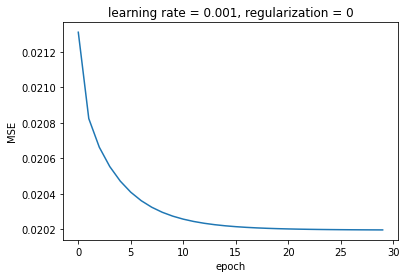

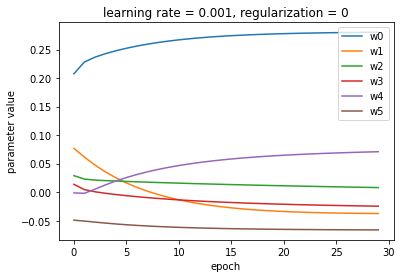

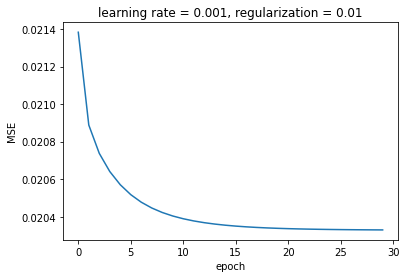

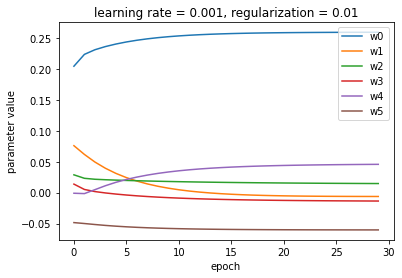

In [ ]:
learning_rate = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]
hyper = []
for lr in range(0, len(learning_rate)):
    for reg in range(0, len(regularization)):
        hyper.append((learning_rate[lr], regularization[reg]))
lowest_scores = []
for hyper_iter in range(0, len(hyper)):
    sgd = LinearRegression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    sgd.fit(X, y, update_rule='sgd_momentum', plot=False)
    lowest_scores.append(sgd.lowest_mse)
    
chosen_hyper = np.argsort(np.array(lowest_scores))[:2]
lowest_scores = []
for hyper_iter in chosen_hyper:
    sgd = LinearRegression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    sgd.fit(X, y, update_rule='sgd_momentum', plot=True)
    lowest_scores.append(sgd.lowest_mse)
print(lowest_scores)

In [ ]:
#best parameters for sgd_momentum
print(hyper[chosen_hyper[0]])  #best combination (lr, regularization)
print(hyper[chosen_hyper[1]])  #second combination

(0.001, 0)
(0.001, 0.01)


Using RMSprop

[0.0202030788658353, 0.020331738674300225]


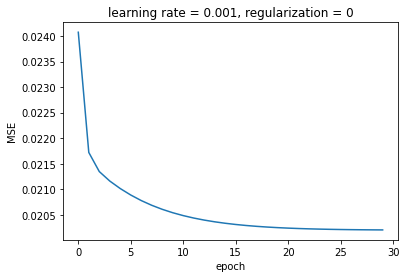

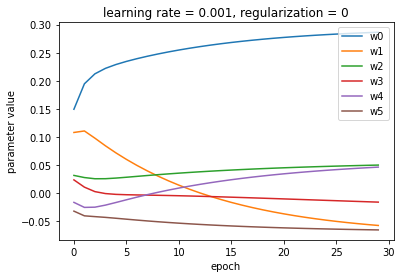

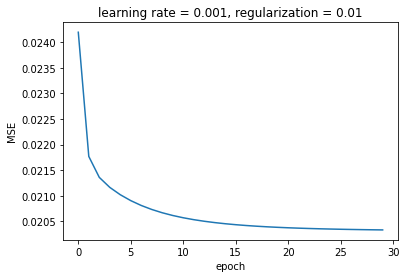

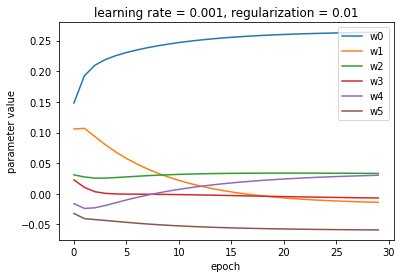

In [ ]:
learning_rate = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]
hyper = []
for lr in range(0, len(learning_rate)):
    for reg in range(0, len(regularization)):
        hyper.append((learning_rate[lr], regularization[reg]))
lowest_scores = []
for hyper_iter in range(0, len(hyper)):
    sgd = LinearRegression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    sgd.fit(X, y, update_rule='rmsprop', plot=False)
    lowest_scores.append(sgd.lowest_mse)
    
chosen_hyper = np.argsort(np.array(lowest_scores))[:2]
lowest_scores = []
for hyper_iter in chosen_hyper:
    sgd = LinearRegression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    sgd.fit(X, y, update_rule='rmsprop', plot=True)
    lowest_scores.append(sgd.lowest_mse)
print(lowest_scores)

In [ ]:
#best parameters for rmsprop
print(hyper[chosen_hyper[0]])  #best combination (lr, regularization)
print(hyper[chosen_hyper[1]])  #second combination

(0.001, 0)
(0.001, 0.01)


Momentum and RMSprop both aim to depress oscillation during training with SGD since SGD uses small batches instead of the whole dataset to update gradients.
Momentum uses weighted combination of previous gradient and current gradient to undo drastic direction shift. However, it still can not be avoid of oscillation since momentum has no vision in second order velocity. It will not do speed down when it is close to a uphill. RMSprop has a adaptive learning rate depending on first and second order information so RMSprop has more vision. Therefore, RMSprop is expected to have more smooth curve than momentum. 

Anyway, since we are doing linear regression in this question, we can see both curves are smooth and momentum even has lower MSE after 30 epoch. Momentum converges to higher mse when we have a regularization term but it seems not difference between regularization = 0 or 0.01 in RMSprop scheme.

#Question 2: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons, .

a) **(4 pts)** Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

d) **(3 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

# Answer:
a) The given dataset, does not have a underlying linear relationship hence a linear boundary is not able to split the dataset into two classes, however Tanh function allows the neural network to learn a non-linear decision boundary which is not possible with a linear model.

b) There is no significant visible difference in this case. But in general, the decision boundaries becomes more tighter as the the number of hidden units increases.

c)The loss curve decreases more steeply with higher LR - the higher LR model will converge faster. High LRs converge to higher losses, the optimization becomes better as we reduce the LR - but if LR is too small, the optimization is much slower and will require more epochs to converge.

When the learning rate is very high (10), the LR curves do not converge to a minimum because of the gradient update and diverges hence the loss is high. Whereas when the learning rate is too small, (0.001), convergence happens with larger number of epochs.

d) Reasonable results and explanations will receive full credits.

# Question 3: Outlier detection using PyOD (30 pts)

Outlier detection, or anomaly detection is usually an unsupervised learning task where the objective is to identify suspicious observations in data. It has been widely used in military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, etc.

PyOD is a comprehensive and scalable Python library for detecting outlying objects in multivariate data. PyOD includes more than 30 detection algorithms and provides unified APIs which makes it quite handy to use. In this question, you will play with PyOD, explore three different outlier detection algorithms and compare their performances. First let's install PyOD.

```
# install pyod using pip first
!pip install pyod
```

You can load the data stored in 'Q3_train_dataset.csv' and 'Q3_test_dataset.csv' using the following codes.

```
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()
```

 `X_train` and `X_test` contain the features, with the dimension of 5. `y_train` and `y_test` store the outlier labels, 0 means normal data, 1 means outlier data. 
 
a) **(5 pts)** **Fit `X_train` to a linear outlier detection model Minimum Covariance Determinant (MCD) using PyOD**, this [page](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.mcd) will provide some functions you may need. 

```
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# YOUR CODE SHOULD COME HERE, FIT THE MODEL USING X_TRAIN
```
**Use the fitted model to predict the outlier labels of `X_test`. Compute the raw outlier scores on `X_test` using `decision_function()`.**

**Run PyOD's `evaluate_print()` function using the test set ground truth outlier labels and the raw outlier scores predicted by the model, to compute the ROC and Precision@n results .**

```
from pyod.utils.data import evaluate_print
```

b) **(5 pts)** `X_train` and `X_test` are 5-dimension features, which makes it impossible to visualize them in Euclidean plane. But we can use Principal Component Analysis (PCA) to reduce the dimensions of `X_train` and `X_test` to 2, and then plot them. You may want to use `fit_and_transform()` function.


```
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = # IMPLEMENT
test_principalComponents = # IMPLEMENT
```

After reducing the dimension to 2, now you can visualize the outliers using PyOD's `visualize()` function. Please plot the visualization. You may find [this](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example) useful on how to use `visualize()` .

```
from pyod.utils.example import visualize
```

Now you should be able to observe the ground truth outliers and the outliers predicted by the model.


c) **(20 pts)** Apply the same process as in (a) and (b) to the following two models, and visualize the outlier results. Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

*   [Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)
*   [Probabilistic model - Copula-based Outlier Detection (COPOD)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.copod)

```
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
```

# Answers:

In [ ]:
# install pyod using pip first
!pip install pyod

In [ ]:
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()

In [ ]:
# (a)
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# fit the model using X_train

# YOUR CODE SHOULD COME HERE

In [ ]:
from pyod.utils.data import evaluate_print
# predict the outlier labels of X_test using the trained model, compute the raw outlier scores on X_test using decision_function()
# then use evaluate_print() to print out the evaluation results

# YOUR CODE SHOULD COME HERE

In [ ]:
# (b)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = # YOUR CODE SHOULD COME HERE
test_principalComponents = # YOUR CODE SHOULD COME HERE

from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()

# YOUR CODE SHOULD COME HERE

In [ ]:
# (c)
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD

# YOUR CODE SHOULD COME HERE

# Solutions:
a)

In [ ]:
from pyod.models.mcd import MCD
#import pandas.testing as tm

clf_name = 'MCD'
clf = MCD()# initialize MCD class using the default parameters

# fit the model using X_train

# YOUR CODE SHOULD COME HERE
clf.fit(X_train)

MCD(assume_centered=False, contamination=0.1, random_state=None,
  store_precision=True, support_fraction=None)

In [ ]:
from pyod.utils.data import evaluate_print
# predict the outlier labels of X_test, compute the raw outlier scores on X_test using decision_function()
# then use evaluate_print() to print out the evaluation results

# YOUR CODE SHOULD COME HERE
y_train_pred = clf.labels_
test_scores = clf.decision_function(X_test)
y_test_pred = clf.predict(X_test)

evaluate_print(clf_name, y_test, test_scores)

# FOR ECE
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

COPOD ROC:0.9556, precision @ rank n:0.8


0.95

b)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


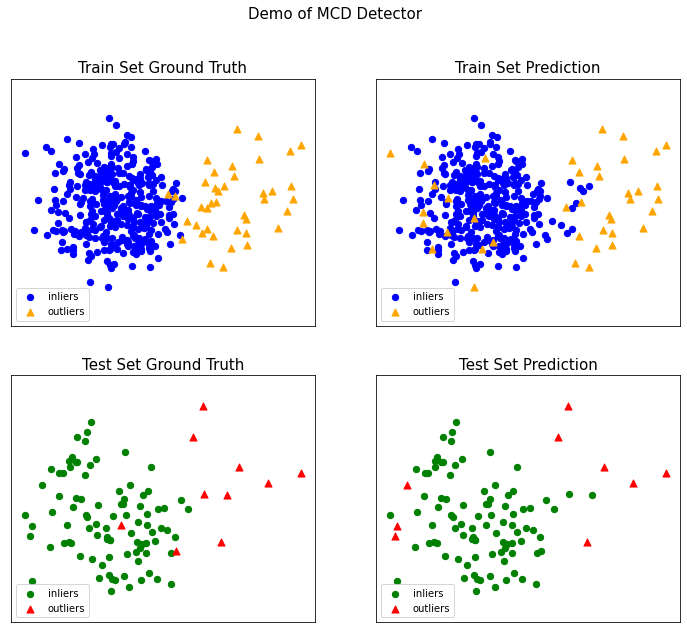

In [ ]:
from pyod.utils.example import visualize
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train)
test_principalComponents = pca.fit_transform(X_test)

from pyod.utils.example import visualize
# Visualize the ground truth outliers and predicted outliers using visualize()

# YOUR CODE SHOULD COME HERE
visualize(clf_name, train_principalComponents, y_train, test_principalComponents, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

c)

In [ ]:
from pyod.models.cblof import CBLOF
# Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)

clf_name = 'CBLOF'
clf = CBLOF()
clf.fit(X_train)
y_train_pred = clf.labels_
test_scores = clf.decision_function(X_test)
y_test_pred = clf.predict(X_test)

evaluate_print(clf_name, y_test, test_scores)

# FOR ECE
accuracy_score(y_test_pred, y_test)

CBLOF ROC:0.9022, precision @ rank n:0.7


0.93

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


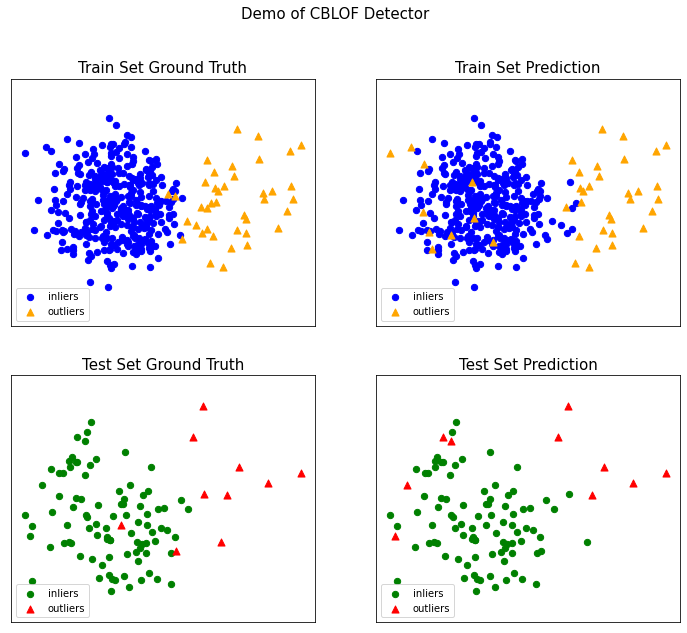

In [ ]:
pca = PCA(n_components=2)
train_principalComponents = pca.fit_transform(X_train)
test_principalComponents = pca.fit_transform(X_test)

visualize(clf_name, train_principalComponents, y_train, test_principalComponents, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

In [ ]:
from pyod.models.copod import COPOD
# Probabilistic model - Copula-based Outlier Detection (COPOD)

clf_name = 'COPOD'
clf = COPOD()
clf.fit(X_train)
y_train_pred = clf.labels_
test_scores = clf.decision_function(X_test)
y_test_pred = clf.predict(X_test)

evaluate_print(clf_name, y_test, test_scores)

# FOR ECE
accuracy_score(y_test_pred, y_test)

COPOD ROC:0.9556, precision @ rank n:0.8


0.95

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


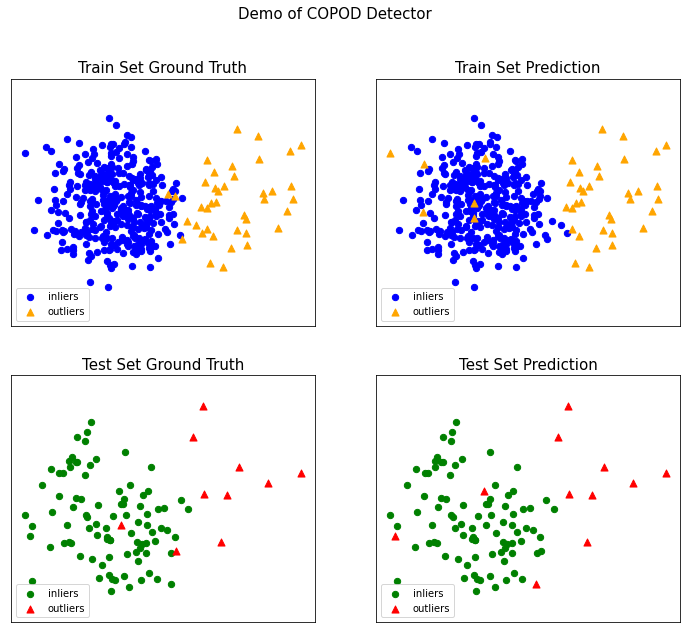

In [ ]:
pca = PCA(n_components=2)
train_principalComponents = pca.fit_transform(X_train)
test_principalComponents = pca.fit_transform(X_test)

visualize(clf_name, train_principalComponents, y_train, test_principalComponents, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

From ROC and Precision@n, we can observe that COPOD>CBLOF>MCD in terms of the outlier detection performance. We can have a more straightforward sense of this from the visualization. From the test set ground truth and prediction plots, we can clearly observe that fewer data are mis-identified in COPOD compared to CBLOF and MCD.

#Question 4: PCA (5 pts)
Explain the principle of Principal Component Analysis algorithm, especially why we can select the best projection bases based on the covariance matrix of data from the perspective of optimization?



# Answer:
a) When we get a high-dimension dataset, we hope to extract valuable information by mapping data into lower-dimension space. Since we hope to maintain the most information, variance is a measurement of information in the perspective of entropy. Therefore, we need to maximize variance by selecting appropriate new bases. It can be proved that the eigenvectors of covariance of data are maximizer in this optimization problem. The corresponding eigenvalue of one eigenvector represents the variance this base has. Only select the eigenvectors with large eigenvalue, we can reduce the dimension of data while maintaining most of the information.
<!-- 
b) Auto-Encoder is one type of model to reduce dimension of data by mapping the input data into latent space with lower dimensions. If no non-linear function is used in the AE model and the dimension of latent vector is of smaller original dimension, AE will get close result to PCA. However, AE is not necessary to have lower dimension of latent vectors. Higher latent dimension can be seens as a transformation from orignal space into more complicated space. What's more, PCA has rigorous mathematical proof and we can get the eigenvectors with SVD quickly but AE need much more resource to train. -->

# Question 5: Pre-processing and sampling (15 pts)

The following dataset contains House prices describing the sales of individual residential property in Ames, Iowa data with explanatory variables describing almost every aspect of residential homes and dependent variable being SalePrice. Here, some cells of most columns in the dataset contain NaN values.













In [ ]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
np.random.seed(100)

data = pd.read_csv("sales_data.csv")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,Gd,706,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,2,548,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,208500
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,TA,978,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,2,460,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,181500
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,Gd,486,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,2,608,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,223500
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,TA,216,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,3,642,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,140000
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,Gd,655,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,3,836,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,250000



a)**(2 pts)**Print the number of NaN values in each column 


In [ ]:
#

b)**(3 pts)**Create a copy of `data`, and name it `data_dm`, then create a new column in `data_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use `pandas.cut()` and modify its paramter list as below:

```
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True
```
Next, perform one-hot encoding on this new column.


c)**(2 pts)**Drop the columns which have more than 65 percentage of missing values


d)**(3 pts)**Take a sample of 800 rows at random and compute its mean. Compare the result with the population mean
  

In [ ]:
np.random.seed(6)
sample_ages = np.random.choice(a= data['SalePrice'], size=800)
#Sample mean

#Population mean

e) i)**(2pts)** Calculate 95% confidence intervals for SalePrice with a sample size of 100. 

ii)**(3pts)** Calculate 95 % confidence intervals for 100 different trials with a sample size of 500.Plot the confidence intervals and interpret how it captures the population mean.

In [ ]:
np.random.seed(10)
sample_size = 100
sample = np.random.choice(a= data_dm['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

#Get the critical Z value


#Get population standard deviation



#margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

#confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

#Print confidence interval and true mean value




In [ ]:
np.random.seed(12)

#define the sample size

intervals = []
sample_means = []

for sample in range(100):
    sample = np.random.choice(a= data_dm['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    #compute z critical value

    #compute population std dev        
  
    
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    

plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()

### Solution:

a)

In [ ]:
data.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageType         81
GarageYrBlt        81
MasVnrArea          8
Electrical          1
CentralAir          0
HeatingQC           0
TotalBsmtSF         0
BsmtFinSF2          0
BsmtUnfSF           0
1stFlrSF            0
2ndFlrSF            0
SalePrice           0
ExterQual           0
BsmtFinSF1          0
GrLivArea           0
YearRemodAdd        0
YearBuilt           0
OverallCond         0
OverallQual         0
LotArea             0
MSZoning            0
LowQualFinSF        0
FullBath            0
BsmtFullBath        0
GarageArea          0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
GarageCars          0
BsmtHalfBath        0
Fireplaces          0
Functional          0
TotRmsAbvGrd        0
KitchenQual         0
KitchenAbv

b)

In [ ]:
data_dm = data.copy()
data_dm['binned_yr_built'] = pd.cut(data_dm['YearBuilt'], 
                               bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020], 
                               labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020'], 
                               include_lowest=True)

In [ ]:
data_dm = pd.get_dummies(data_dm, columns=['binned_yr_built'])
data_dm.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice,binned_yr_built_1900-1920,binned_yr_built_1920-1940,binned_yr_built_1940-1960,binned_yr_built_1960-1980,binned_yr_built_1980-2000,binned_yr_built_2000-2020
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,Gd,706,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,2,548,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,208500,0,0,0,0,0,1
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,TA,978,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,2,460,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,181500,0,0,0,1,0,0
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,Gd,486,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,2,608,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,223500,0,0,0,0,0,1
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,TA,216,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,3,642,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,140000,1,0,0,0,0,0
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,Gd,655,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,3,836,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,250000,0,0,0,0,1,0


c)

In [ ]:
data_dm = data_dm.replace([0,'','NULL','NaN'],np.nan)
data_dm.dropna(thresh=data_dm.shape[0]*0.65,how='all',axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageType,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,7,5,2003,2003,Gd,706.0,150.0,856.0,Ex,Y,SBrkr,856,1710,2.0,3.0,1.0,Gd,8,Typ,Attchd,2003.0,2.0,548.0,2,2008,208500
1,20,RL,80.0,9600,6,8,1976,1976,TA,978.0,284.0,1262.0,Ex,Y,SBrkr,1262,1262,2.0,3.0,1.0,TA,6,Typ,Attchd,1976.0,2.0,460.0,5,2007,181500
2,60,RL,68.0,11250,7,5,2001,2002,Gd,486.0,434.0,920.0,Ex,Y,SBrkr,920,1786,2.0,3.0,1.0,Gd,6,Typ,Attchd,2001.0,2.0,608.0,9,2008,223500
3,70,RL,60.0,9550,7,5,1915,1970,TA,216.0,540.0,756.0,Gd,Y,SBrkr,961,1717,1.0,3.0,1.0,Gd,7,Typ,Detchd,1998.0,3.0,642.0,2,2006,140000
4,60,RL,84.0,14260,8,5,2000,2000,Gd,655.0,490.0,1145.0,Ex,Y,SBrkr,1145,2198,2.0,4.0,1.0,Gd,9,Typ,Attchd,2000.0,3.0,836.0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,6,5,1999,2000,TA,NaN,953.0,953.0,Ex,Y,SBrkr,953,1647,2.0,3.0,1.0,TA,7,Typ,Attchd,1999.0,2.0,460.0,8,2007,175000
1456,20,RL,85.0,13175,6,6,1978,1988,TA,790.0,589.0,1542.0,TA,Y,SBrkr,2073,2073,2.0,3.0,1.0,TA,7,Min1,Attchd,1978.0,2.0,500.0,2,2010,210000
1457,70,RL,66.0,9042,7,9,1941,2006,Ex,275.0,877.0,1152.0,Ex,Y,SBrkr,1188,2340,2.0,4.0,1.0,Gd,9,Typ,Attchd,1941.0,1.0,252.0,5,2010,266500
1458,20,RL,68.0,9717,5,6,1950,1996,TA,49.0,NaN,1078.0,Gd,Y,FuseA,1078,1078,1.0,2.0,1.0,Gd,5,Typ,Attchd,1950.0,1.0,240.0,4,2010,142125


d)

In [ ]:
np.random.seed(6)
sample_ages = np.random.choice(a= data['SalePrice'], size=800)
print ("Sample mean:", sample_ages.mean() )          

print("Population mean:", data['SalePrice'].mean())

Sample mean: 178292.63125
Population mean: 180921.19589041095


e)

In [ ]:
#100 samples
np.random.seed(10)
sample_size = 100
sample = np.random.choice(a= data_dm['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.95)  

                              
pop_stdev = data_dm['SalePrice'].std()  

#margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

#confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data_dm['SalePrice'].mean()))

Confidence interval: (169025.40109989812, 195159.65890010187)
True mean: 180921.19589041095


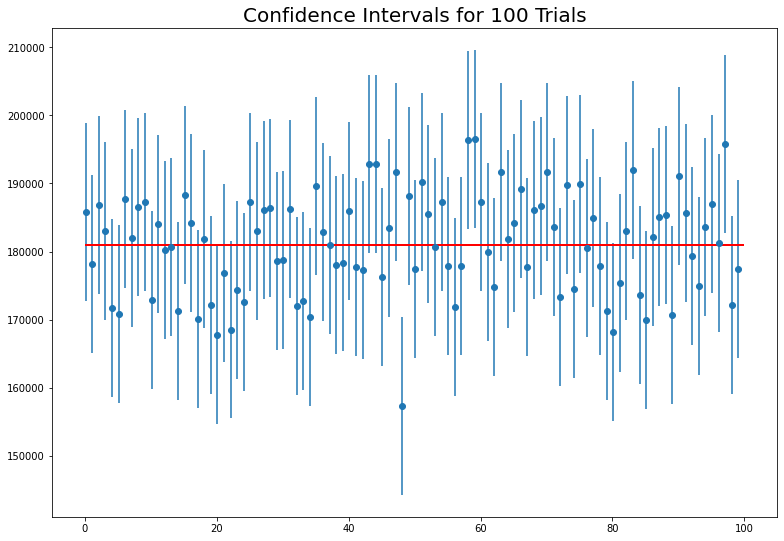

In [ ]:
np.random.seed(12)
import matplotlib.pyplot as plt

sample_size = 100

intervals = []
sample_means = []

for sample in range(100):
    sample = np.random.choice(a= data_dm['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    z_critical = stats.norm.ppf(q = 0.95)         
    pop_stdev = data_dm['SalePrice'].std()  
    #stats.norm.ppf(q = 0.025)
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    

plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],fmt='o')

plt.hlines(xmin=0, xmax=100,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()

We can observe that for (approximately) 95% of the time the sample mean overlaps with the the true mean.